In [110]:
from tifffile import imwrite
from skimage.util import img_as_uint
from tkinter import filedialog as fd
import os
from os.path import dirname, basename
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
from rich.progress import track
import pickle

pd.options.mode.chained_assignment = None  # default='warn'

In [111]:
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/FL_SPT_in_condensates/FL-FUS488-ALEX-PAINT/20230928-GOX-473nm-50per-640nm-20per-20msALEX/reconstructed_seperate_channel"
os.chdir(folder_save)
idx_FOV = [2, 4, 5, 6]

In [112]:
lst_left_loc = []
lst_right_loc = []
lst_left_step = []
lst_right_step = []
for idx in idx_FOV:
    fname_left_loc = "20230928-FOV-" + str(idx) + "-left-threshold-10-PAINT_phys_unit.p"
    fname_right_loc = (
        "20230928-FOV-" + str(idx) + "-right-threshold-10-PAINT_phys_unit.p"
    )
    fname_left_step = "20230928-FOV-" + str(idx) + "-left-MeanStepSize_phys_unit.p"
    fname_right_step = "20230928-FOV-" + str(idx) + "-right-MeanStepSize_phys_unit.p"
    img_left_loc = pickle.load(open(fname_left_loc, "rb"))
    img_right_loc = pickle.load(open(fname_right_loc, "rb"))
    img_left_step = pickle.load(open(fname_left_step, "rb"))
    img_right_step = pickle.load(open(fname_right_step, "rb"))
    selector = ((img_left_loc > 50) | (img_right_loc > 50)) & (
        (img_left_step > 0) | (img_right_step > 0)
    )
    lst_left_loc.append(img_left_loc[selector].flatten())
    lst_right_loc.append(img_right_loc[selector].flatten())
    lst_left_step.append(img_left_step[selector].flatten())
    lst_right_step.append(img_right_step[selector].flatten())

left_loc = np.hstack(lst_left_loc)
right_loc = np.hstack(lst_right_loc)
left_step = np.hstack(lst_left_step)
right_step = np.hstack(lst_right_step)

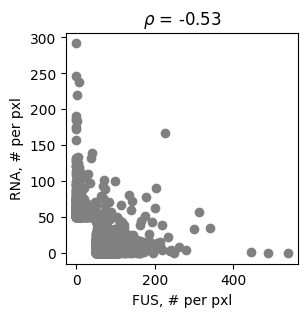

In [113]:
plt.figure(figsize=(3, 3))
plt.scatter(left_loc, right_loc, color="gray")
plt.xlabel("FUS, # per pxl")
plt.ylabel("RNA, # per pxl")
rho, pval = pearsonr(left_loc, right_loc)
plt.title(r"$\rho$ = " + str(round(rho, 2)))
plt.savefig("FUSloc_RNAloc.png", dpi=600, bbox_inches="tight", format="png")

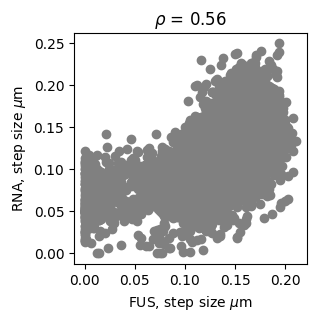

In [114]:
plt.figure(figsize=(3, 3))
plt.scatter(left_step, right_step, color="gray")
plt.xlabel(r"FUS, step size $\mu$m")
plt.ylabel(r"RNA, step size $\mu$m")
rho, pval = pearsonr(left_step, right_step)
plt.title(r"$\rho$ = " + str(round(rho, 2)))
plt.savefig("FUSstep_RNAstep.png", dpi=600, bbox_inches="tight", format="png")

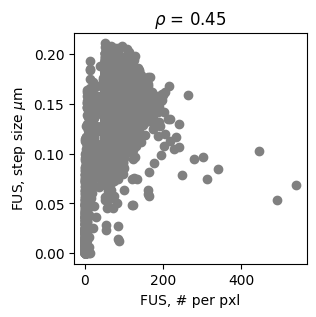

In [115]:
plt.figure(figsize=(3, 3))
plt.scatter(left_loc, left_step, color="gray")
plt.xlabel("FUS, # per pxl")
plt.ylabel(r"FUS, step size $\mu$m")
rho, pval = pearsonr(left_loc, left_step)
plt.title(r"$\rho$ = " + str(round(rho, 2)))
plt.savefig("FUSloc_FUSstep.png", dpi=600, bbox_inches="tight", format="png")

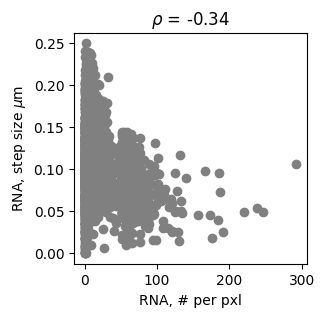

In [116]:
plt.figure(figsize=(3, 3))
plt.scatter(right_loc, right_step, color="gray")
plt.xlabel("RNA, # per pxl")
plt.ylabel(r"RNA, step size $\mu$m")
rho, pval = pearsonr(right_loc, right_step)
plt.title(r"$\rho$ = " + str(round(rho, 2)))
plt.savefig("RNAloc_RNAstep.png", dpi=600, bbox_inches="tight", format="png")

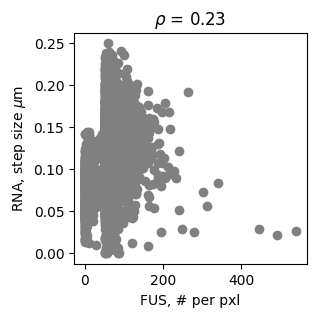

In [117]:
plt.figure(figsize=(3, 3))
plt.scatter(left_loc, right_step, color="gray")
plt.xlabel("FUS, # per pxl")
plt.ylabel(r"RNA, step size $\mu$m")
rho, pval = pearsonr(left_loc, right_step)
plt.title(r"$\rho$ = " + str(round(rho, 2)))
plt.savefig("FUSloc_RNAstep.png", dpi=600, bbox_inches="tight", format="png")

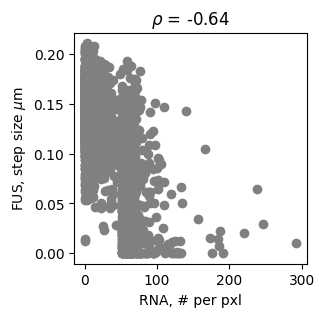

In [118]:
plt.figure(figsize=(3, 3))
plt.scatter(right_loc, left_step, color="gray")
plt.xlabel("RNA, # per pxl")
plt.ylabel(r"FUS, step size $\mu$m")
rho, pval = pearsonr(right_loc, left_step)
plt.title(r"$\rho$ = " + str(round(rho, 2)))
plt.savefig("RNAloc_FUSstep.png", dpi=600, bbox_inches="tight", format="png")